# AffinityPropagation Demo

Demonstrate basic usage of scikit-learn's `AffinityPropagation` algorithm to cluster data.

### When should AffinityPropagation be used?

Use `AffinityPropagation` when you don't have to know ahead of time how many clusters you're expecting.

Another algorithm where you don't have to know ahead of time how many clusters you're expecting is `DBSCAN`, but it does require you to specify the minimum number of samples (or total weight) required for a neighborhood of points to form a cluster. For the _in situ_ transcriptomics annotation project, sometimes the "clusters" I need to pay attention to only had a handful of annotations, or even just one, so I could not use an algorithm where I would need to specify the minimum number of points in a cluster.

scikit-learn (links to documentation below) has really nice implementations for both of these algorithms.

### Resources

Installation instructions for scikit-learn:
- https://scikit-learn.org/stable/install.html

Explanation of how `AffinityPropagation` works:
- https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8#:~:text=Affinity%20Propagation%20was%20first%20published,and%20Delbert%20Dueck%20in%20Science.&text=In%20layman's%20terms%2C%20in%20Affinity,relative%20attractiveness%20to%20the%20sender

scikit-learn `AffinityPropagation` documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html

scikit-learn `DBSCAN` documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Notebook written July 22, 2020 by Jenny Vo-Phamhi. Please Slack or email me if you have any questions!

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt
plt.style.use('seaborn-poster')

## Make blobs

Simulate data we might cluster by just making a bunch of random coordinates that have blobby shapes.

In [2]:
coords, clusters = make_blobs(n_samples=300, centers=10, cluster_std=0.60, random_state=0)

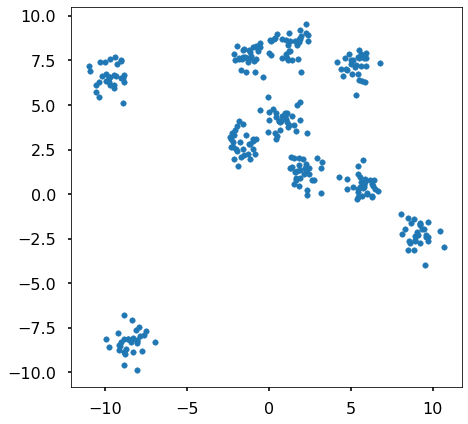

In [3]:
plt.figure(figsize=(7, 7))
plt.scatter(coords[:,0], coords[:,1], alpha=1, s=30)
plt.show()

## Run AffinityPropagation

#### Initialize and train the AffinityPropagation model

The preference parameter can be toggled to influence the likelihood that you get more or fewer clusters, as we will see later in this notebook. For now, let's just set this to -50.

af is our AffinityPropagation model, ready to use.

In [4]:
af = AffinityPropagation(preference=-50)

#### Fit the coordinates to the model.

In [5]:
cluster_object = af.fit(coords)

#### View cluster centers
The return value of `fit()` contains the cluster centers, which are the coordinates in `coords` that are the most exemplary / closest to the "center" of the clusters.

In [6]:
print(cluster_object.cluster_centers_)

[[ 5.79752492  0.51351523]
 [ 0.74387399  4.12240568]
 [ 2.13141478  1.13885728]
 [-1.32798412  7.65678549]
 [ 5.28111529  7.27020408]
 [ 9.08672351 -2.27272952]
 [-9.71737016  6.58646724]
 [ 1.17542256  8.37185277]
 [-8.45969872 -8.28777613]
 [-1.80022352  2.92836976]]


From the return value of `fit()`, you can also get labels for each of the coordinates in coord; each label indicates which cluster our model thinks the corresponding coordinate should correspond to.

In [7]:
print(cluster_object.labels_)

[2 9 7 0 5 2 9 4 1 8 2 4 0 9 6 6 0 6 3 4 7 6 1 6 9 0 5 8 7 8 2 7 6 4 8 1 7
 2 3 3 1 2 4 2 6 8 6 0 9 1 7 0 1 7 0 4 9 4 0 5 6 5 9 0 0 7 6 7 3 0 7 8 8 7
 7 4 4 6 5 5 6 1 4 6 4 8 3 9 5 0 2 5 6 8 1 3 4 7 9 7 3 9 9 6 5 8 6 9 9 6 7
 8 6 3 3 6 1 5 5 2 5 5 9 0 5 2 4 3 2 4 7 0 9 3 2 8 0 0 5 3 3 7 3 8 8 4 7 7
 5 5 9 4 6 0 0 6 1 4 4 7 2 7 2 7 4 1 6 4 7 1 4 1 5 4 5 8 5 2 8 1 1 5 2 7 8
 2 9 9 4 1 4 3 1 6 7 8 5 3 1 0 9 2 0 8 9 1 1 1 5 4 7 1 8 1 2 7 0 8 9 0 1 2
 8 3 8 2 5 0 8 9 4 9 0 1 1 2 0 0 5 3 2 6 3 3 0 6 5 7 1 6 0 8 2 1 6 2 5 8 6
 2 3 4 7 9 3 9 0 7 3 3 4 1 2 8 9 8 8 1 6 2 5 3 7 0 1 3 9 9 2 4 4 6 3 9 2 5
 3 5 8 7]


Here's the result when we plot `coords`, colored by cluster labels.

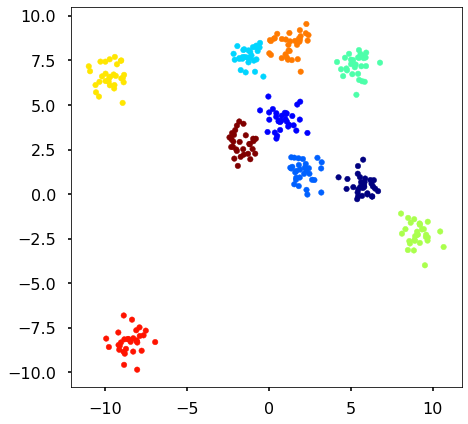

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.show()

# The "preferance" parameter

This parameter is the only thing you have to feed in. Let's talk about what happens when you toggle it and how to pick it for your data. 

## What happens when you toggle the "preferance parameter" to different values?

Making the preferance parameter more negative makes it more likely that you will get fewer clusters.

Making the preferance parameter less negative makes it more likely that you will get more clusters.

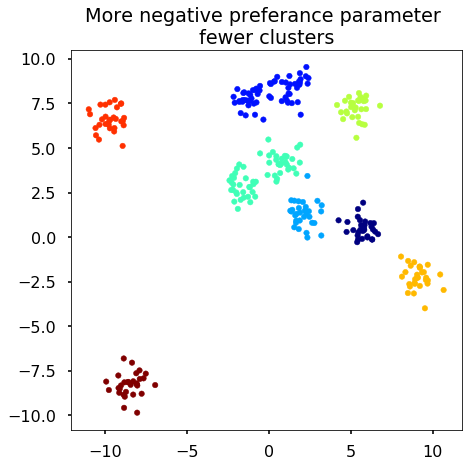

In [9]:
af = AffinityPropagation(preference=-130)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('More negative preferance parameter \nfewer clusters')
plt.show()

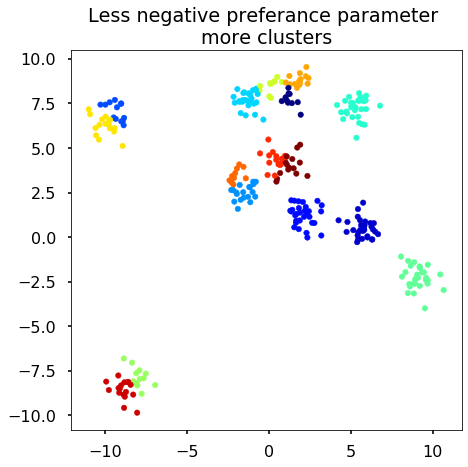

In [10]:
af = AffinityPropagation(preference=-10)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('Less negative preferance parameter \nmore clusters')
plt.show()

When the preferance parameter is nonnegative, every coordinate is its own cluster.

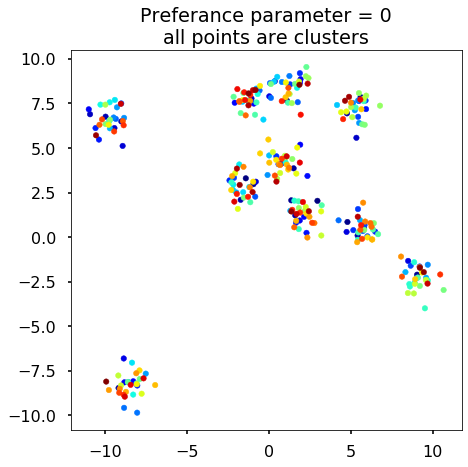

In [11]:
af = AffinityPropagation(preference=0)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('Preferance parameter = 0\nall points are clusters')
plt.show()

It's sometimes hard to predict how much you can toggle the preference parameter without changing the results of clustering. 

E.g. setting it to -90 for these coordinates gives you the same result as setting it to -50.

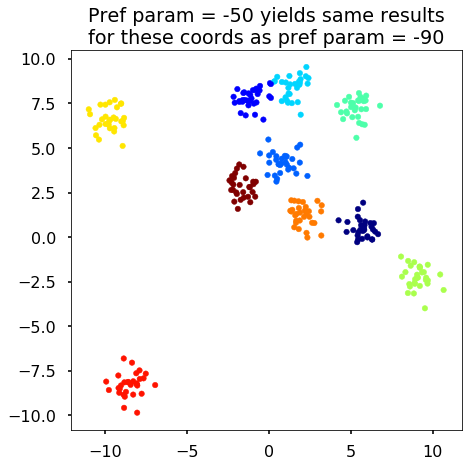

In [12]:
af = AffinityPropagation(preference=-90)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('Pref param = -50 yields same results\nfor these coords as pref param = -90')
plt.show()

Sometimes, the wrong preferance parameter will cause the model to not converge when you call `fit()`.

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


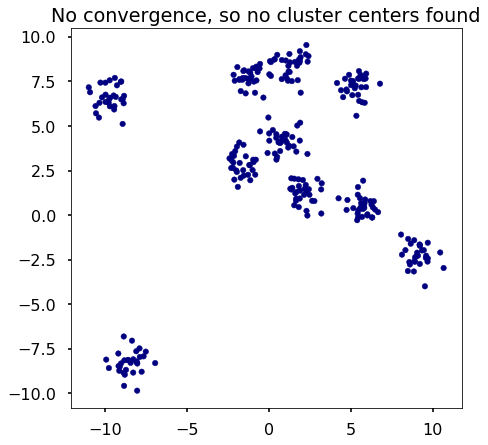

In [13]:
af = AffinityPropagation(preference=-900)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('No convergence, so no cluster centers found')
plt.show()

## How do we pick the preferance parameter?

Fortunately, it's unlikely you'll have to tune the preferance parameter every single time you need to cluster something. For example, for the _in situ_ transcriptomics annotation project, we're having crowdworkers annotate microscopy images of the same dimensions and approximate magnification, so we can expect the annotations that we need to cluster to not look wildly different every time, in terms of how they're spread out and how bunched up they are. The _in situ_ transcriptomics annotations looks something like this:

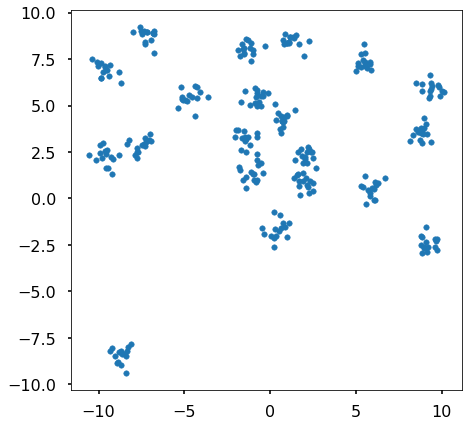

In [14]:
coords, clusters = make_blobs(n_samples=300, centers=20, cluster_std=0.40, random_state=0)
plt.figure(figsize=(7, 7))
plt.scatter(coords[:,0], coords[:,1], alpha=1, s=30)
plt.show()

Which we cluster as follows:

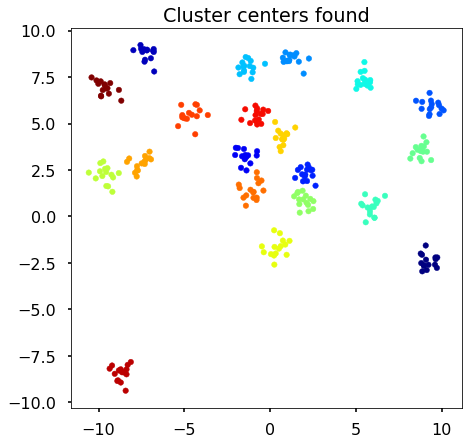

In [16]:
af = AffinityPropagation(preference=-10)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('Cluster centers found')
plt.show()

And as long as we expect things to look similar, we can use the same preference parameter.

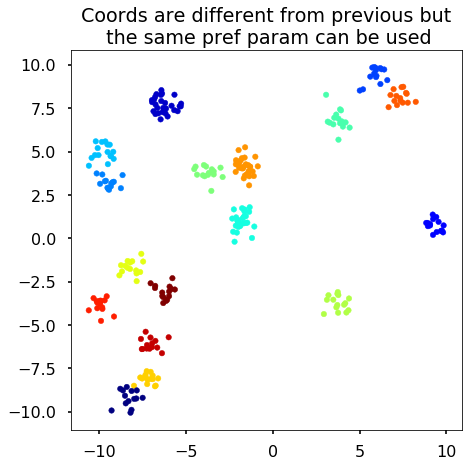

In [17]:
coords, clusters = make_blobs(n_samples=300, centers=20, cluster_std=0.40, random_state=1)
af = AffinityPropagation(preference=-10)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('Coords are different from previous but\n the same pref param can be used')
plt.show()

There's a certain amount of wiggle room for how much the annotation distribution can vary while still using the same preference parameter and getting desired results.

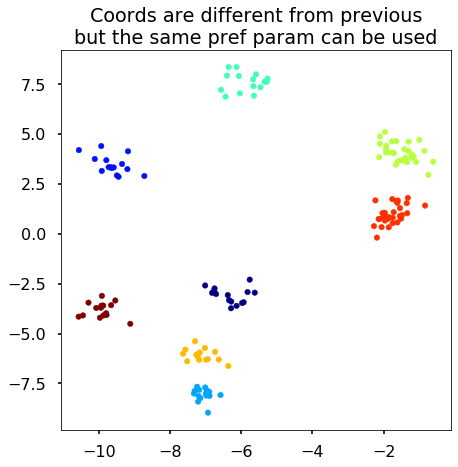

In [18]:
coords, clusters = make_blobs(n_samples=150, centers=10, cluster_std=0.40, random_state=1)
af = AffinityPropagation(preference=-10)
cluster_object = af.fit(coords)
plt.figure(figsize=(7,7))
plt.scatter(coords[:,0], coords[:,1], c=cluster_object.labels_, cmap='jet', alpha=1, s=30)
plt.title('Coords are different from previous\nbut the same pref param can be used')
plt.show()